In [38]:
import kagglehub
import pandas as pd
import os

In [135]:
dataset_path = kagglehub.dataset_download("raedaddala/top-500-600-movies-of-each-year-from-1960-to-2024")

csv_filename = os.path.join(dataset_path, "final_dataset.csv")
df = pd.read_csv(csv_filename)


In [ ]:
# Counting number of unique languages 
df_exploded = df[df['languages'].notna() & (df['languages'] != 'None')]

df_exploded['languages'] = df_exploded['languages'].apply(lambda x: eval(x) if isinstance(x, str) else x)

df_exploded = df_exploded.explode('languages')

language_counts = df_exploded['languages'].value_counts()

unique_language_count = language_counts.shape[0]

print(f"Total unique languages: {unique_language_count}")
print(language_counts)

C:\Users\Mansi\AppData\Local\Temp\ipykernel_21552\1290653424.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded['languages'] = df_exploded['languages'].apply(lambda x: eval(x) if isinstance(x, str) else x)


Total unique languages: 258
languages
English         42764
French           6337
Spanish          4891
None             4834
Italian          4260
                ...  
Washoe              1
Iban                1
Tok Pisin           1
More                1
Kabuverdianu        1
Name: count, Length: 258, dtype: int64


In [ ]:
# Counting number of unique genres
df_exploded_genres = df[df['genres'].notna() & (df['genres'] != 'None')]

df_exploded_genres['genres'] = df_exploded_genres['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_exploded_genres['genres'] = df_exploded_genres['genres'].apply(lambda x: [genre.lower() for genre in x] if isinstance(x, list) else x)

df_exploded_genres = df_exploded_genres.explode('genres')

genre_counts = df_exploded_genres['genres'].value_counts()

unique_genre_count = genre_counts.shape[0]

print(f"Total unique genres: {unique_genre_count}")
print(genre_counts)

C:\Users\Mansi\AppData\Local\Temp\ipykernel_21552\1235636479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded_genres['genres'] = df_exploded_genres['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)
C:\Users\Mansi\AppData\Local\Temp\ipykernel_21552\1235636479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exploded_genres['genres'] = df_exploded_genres['genres'].apply(lambda x: [genre.lower() for genre in x] if isinstance(x, list) else x)


Total unique genres: 192
genres
drama         35871
comedy        19069
romance       14207
thriller       9719
crime          9624
              ...  
sitcom            4
josei             1
reality tv        1
talk show         1
game show         1
Name: count, Length: 192, dtype: int64


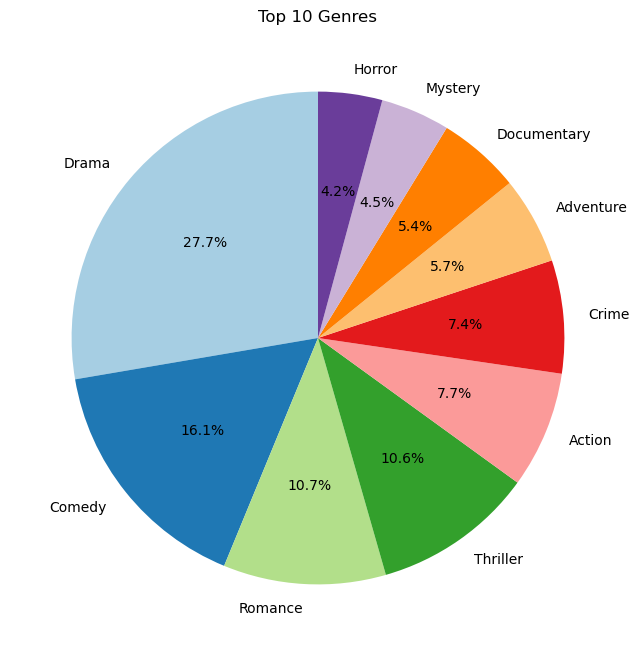

Total number of unique genres: 192


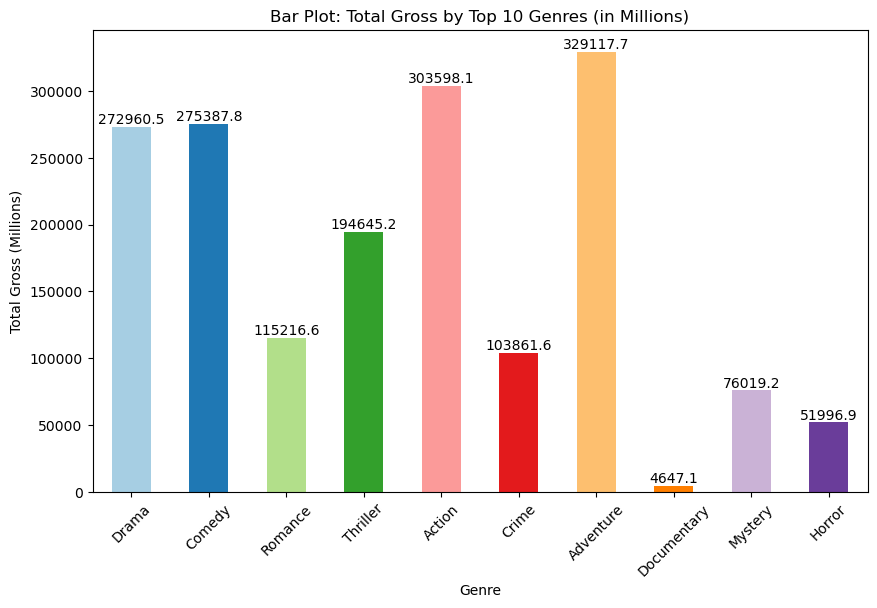

In [136]:
import matplotlib.pyplot as plt
import pandas as pd

def safe_eval(x):
    try:
        return eval(x) if isinstance(x, str) else x
    except Exception as e:
        return []

df['genres'] = df['genres'].apply(safe_eval)

df = df.dropna(subset=['genres', 'rating', 'gross_worldwide'])

df_exploded = df.explode('genres')

genre_counts = df_exploded['genres'].value_counts()

top_10_genres = genre_counts.head(10)

plt.figure(figsize=(8, 8))
ax = top_10_genres.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Top 10 Genres')
plt.ylabel('')  
plt.show()

total_unique_genres = len(genre_counts)
print(f"Total number of unique genres: {total_unique_genres}")

df_exploded['gross_worldwide'] = df_exploded['gross_worldwide'].replace({r'\$': '', r',': ''}, regex=True)
df_exploded['gross_worldwide'] = pd.to_numeric(df_exploded['gross_worldwide'], errors='coerce')

df_exploded = df_exploded.dropna(subset=['gross_worldwide'])

df_exploded['gross_worldwide'] = df_exploded['gross_worldwide'].astype(int)

df_exploded['gross_worldwide_million'] = df_exploded['gross_worldwide'] / 1_000_000

total_gross_by_genre = df_exploded.groupby('genres')['gross_worldwide_million'].sum()

top_10_gross = total_gross_by_genre[top_10_genres.index]

plt.figure(figsize=(10, 6))
ax = top_10_gross.plot(kind='bar', color=plt.cm.Paired.colors[:len(top_10_gross)])

# Add the original values over each bar
for i, value in enumerate(top_10_gross):
    ax.text(i, value + 2, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.title('Bar Plot: Total Gross by Top 10 Genres (in Millions)')
plt.xlabel('Genre')
plt.ylabel('Total Gross (Millions)')

plt.xticks(rotation=45)

plt.show()


C:\Users\Mansi\AppData\Local\Temp\ipykernel_21552\2428271391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_cleaned['budget'] = df_sample_cleaned['budget'].replace({r'\$': '', r',': '', r'\(.*\)': ''}, regex=True)
C:\Users\Mansi\AppData\Local\Temp\ipykernel_21552\2428271391.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_cleaned['gross_worldwide'] = df_sample_cleaned['gross_worldwide'].replace({r'\$': '', r',': '', r'\(.*\)': ''}, regex=True)
C:\Users\Mansi\AppData\Local\Temp\ip

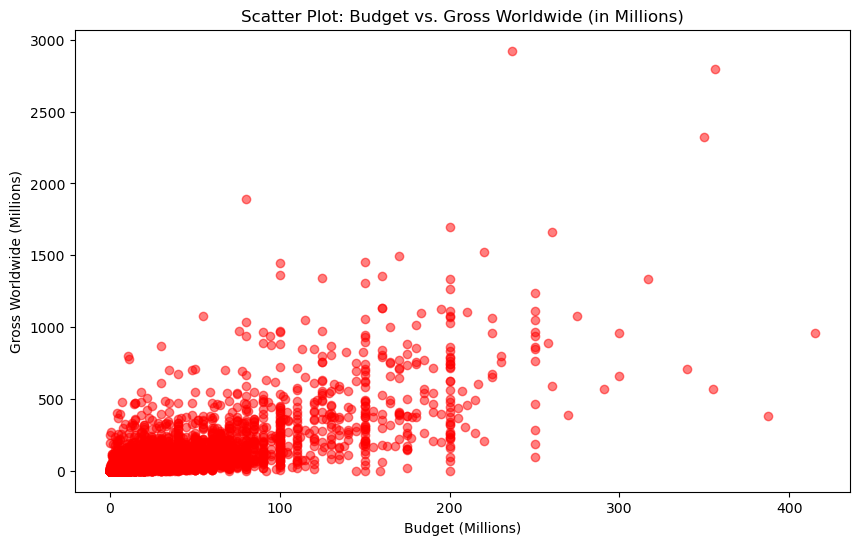

Correlation between Budget and Gross Worldwide (First 50000 Rows): 0.73


In [ ]:
# Gross earnings vs budget
import matplotlib.pyplot as plt

df_sample = df.head(40000)

df_sample_cleaned = df_sample.dropna(subset=['budget', 'gross_worldwide'])

df_sample_cleaned['budget'] = df_sample_cleaned['budget'].replace({r'\$': '', r',': '', r'\(.*\)': ''}, regex=True)
df_sample_cleaned['gross_worldwide'] = df_sample_cleaned['gross_worldwide'].replace({r'\$': '', r',': '', r'\(.*\)': ''}, regex=True)

df_sample_cleaned['budget'] = pd.to_numeric(df_sample_cleaned['budget'], errors='coerce')
df_sample_cleaned['gross_worldwide'] = pd.to_numeric(df_sample_cleaned['gross_worldwide'], errors='coerce')

df_sample_cleaned = df_sample_cleaned.dropna(subset=['budget', 'gross_worldwide'])

df_sample_cleaned['budget_million'] = df_sample_cleaned['budget'] / 1_000_000
df_sample_cleaned['gross_worldwide_million'] = df_sample_cleaned['gross_worldwide'] / 1_000_000

if df_sample_cleaned.empty:
    print("Dataframe is empty after cleaning and conversion!")
else:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_sample_cleaned['budget_million'], df_sample_cleaned['gross_worldwide_million'], alpha=0.5, color='red')

    plt.title('Scatter Plot: Budget vs. Gross Worldwide (in Millions)')
    plt.xlabel('Budget (Millions)')
    plt.ylabel('Gross Worldwide (Millions)')

    plt.show()

    correlation = df_sample_cleaned['budget_million'].corr(df_sample_cleaned['gross_worldwide_million'])
    print(f"Correlation between Budget and Gross Worldwide (First 50000 Rows): {correlation:.2f}")


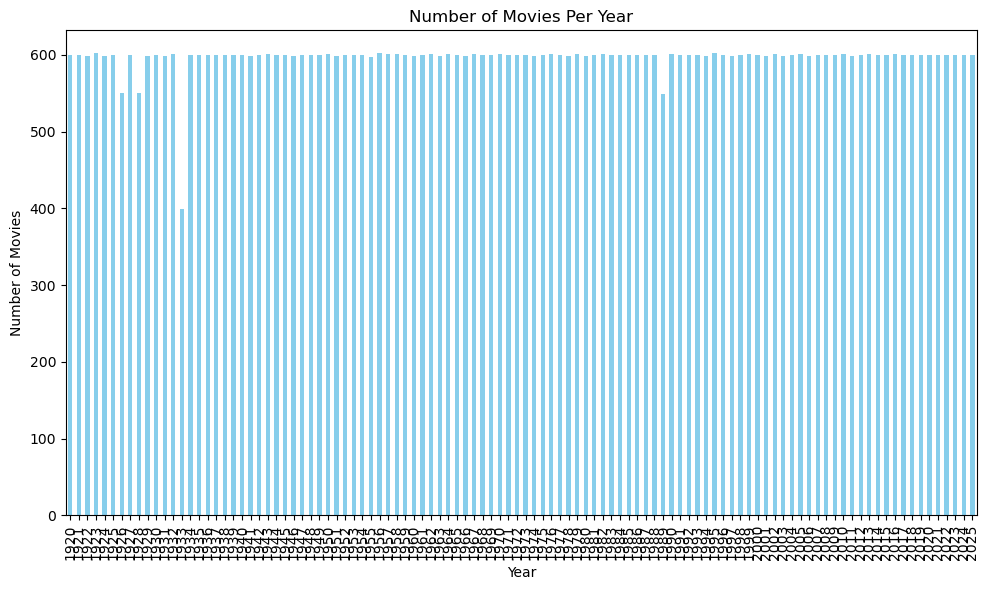

In [133]:
import matplotlib.pyplot as plt

df_cleaned = df.dropna(subset=['year'])

movies_per_year = df_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()